# Algoritmos Evolutivos - Ejemplo en Python

Este notebook muestra cómo funciona un algoritmo evolutivo (Genetic Algorithm) paso a paso, usando como ejemplo la función $f(x) = x \cdot \sin(x)$.

## Caracteristicas del Algoritmo

### Representación

Se usan vectores reales (números continuos), no cadenas binarias como en los algoritmos genéticos.

Ejemplo: una solución puede ser 
[𝑥1,𝑥2,...,𝑥𝑛].

### Operadores

- Mutación = es el operador principal. Se agrega ruido gaussiano a las variables.

- Generación = corresponde a un ciclo del algoritmo, donde se crean descendientes a partir de los padres, se evalúan y se seleccionan los mejores para la siguiente iteración.

- Dimensión = es el número de variables de decisión del problema (el tamaño del vector 𝑥). Cada componente del vector se muta con ruido gaussiano.

- Recombinación (opcional) = combina varios padres para crear un hijo, pero se usa menos que en los algoritmos genéticos.

- Seed (semilla) = un valor inicial para el generador de números aleatorios.

    Se usa para hacer reproducible el experimento: si usas la misma semilla, obtendrás exactamente los mismos padres, mutaciones y resultados cada vez que corras el algoritmo.



### Notación Clásica


- 𝜇(mu): número de padres (los individuos que sobreviven cada generación y sirven como base para crear descendencia).
- 𝜌(rho): número de padres que se recombinan (no siempre es necesario que todos los padres participen en cada cruce).
- 𝜆(lambda): número de descendientes (los hijos creados a partir de los padres en cada generación).

### Librerias Importadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problema a Resolver

Minimizar la Función esfera la cual es una de las funciones de prueba más clásicas en optimización matemática y algoritmos evolutivos.

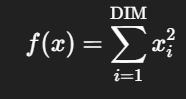

In [ ]:

def fitness(x):
    return np.sum(x**2)

### Inicialización usando tipo (1+1)-ES
- Cada padre genera 1  hijo por mutación.
- Solo los hijos compiten, los padres no sobreviven.

### ¿Cuando usar este tipo?

El problema es simple o de baja dimensión.

No necesitas explorar mucho, solo refinar una solución.

Quieres mostrar el concepto básico de evolución (para enseñanza/demostración).

📌 Ejemplo: Ajustar un único parámetro de un modelo físico.

Mejor solución encontrada: [-0.05131946 -0.07760169]
Fitness mínima: 0.008655708450566901 en generación 38


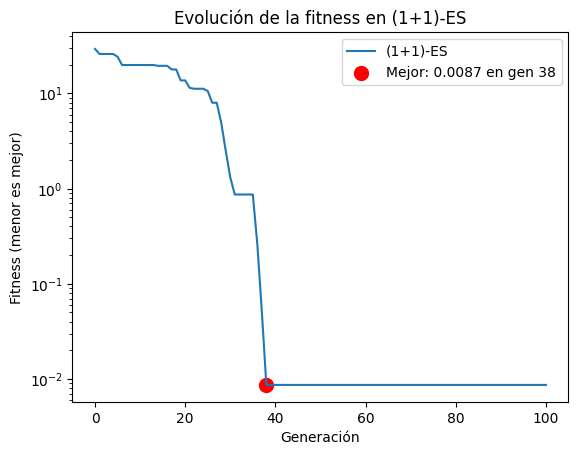

In [33]:
# --- Parámetros ---
DIM = 2
GENS = 100
SIGMA = 0.5
SEED = 42

rng = np.random.default_rng(SEED)

# --- Inicialización ---
parent = rng.normal(0, 5, size=DIM)
parent_fit = fitness(parent)
history = [parent_fit]

# --- (1+1)-ES loop ---
for gen in range(GENS):
    child = parent + rng.normal(0, SIGMA, size=DIM)
    child_fit = fitness(child)
    
    if child_fit < parent_fit:
        parent, parent_fit = child, child_fit
    
    history.append(parent_fit)

# --- Resultados ---
best_fit = min(history)
best_gen = history.index(best_fit)
print("Mejor solución encontrada:", parent)
print("Fitness mínima:", best_fit, "en generación", best_gen)

# --- Gráfica de evolución ---
plt.plot(history, label="(1+1)-ES")
plt.xlabel("Generación")
plt.ylabel("Fitness (menor es mejor)")
plt.yscale("log")
plt.title("Evolución de la fitness en (1+1)-ES")

# --- Marcar mejor fitness ---
plt.scatter(best_gen, best_fit, color='red', s=100, 
            label=f'Mejor: {best_fit:.4f} en gen {best_gen}')
plt.legend()
plt.show()

### Representación Gráfica

- Eje X → Generaciones (0 a GENS).
- Eje Y (log) → Fitness mínima de cada generación, en escala logarítmica.
- Curva → Cómo mejora el mejor individuo con cada generación. La línea representa history_mu_lambda, que almacena el fitness mínimo de cada generación.

### Comportamiento

#### Inicio (generación 0-10)

- Los padres se inicializan con rng.normal(0,5), por lo que sus valores están muy dispersos y la fitness es alta.
- En la gráfica se ve una caída rápida porque las mutaciones generan hijos mucho más cercanos al mínimo global (0).

#### Medio (generación 10-50)

- La mejora sigue ocurriendo, pero más lenta, ya que los hijos comienzan a agruparse cerca del mínimo y las mutaciones solo producen refinamientos pequeños.
- La gráfica se aplaca gradualmente, mostrando un comportamiento de explotación sobre la mejor zona encontrada.

#### Final (generación 50-100)

- La fitness se estabiliza cerca de cero, ya que el algoritmo ha convergido al mínimo global de la función sum(x**2).
- La gráfica casi se hace horizontal, indicando que las mutaciones ya no logran mejoras significativas y la solución ha alcanzado un óptimo aproximado.

### Inicialización usando (μ+λ)-ES

- De μ padres se generan λ hijos,
- Compiten padres + hijos juntos, los mejores sobreviven.

### ¿Cuando usar este tipo?

El problema es muy ruidoso o difícil, y quieres explorar bien el espacio.

Quieres diversidad en las soluciones (porque los padres no sobreviven).

Necesitas evitar que la población se quede atrapada en óptimos locales.

📌 Ejemplo: Optimizar funciones con muchas irregularidades o con múltiples óptimos locales (como en aerodinámica o problemas de ingeniería).

Mejor solución (μ,λ): [ 0.17613706 -0.01971307]
Fitness mínima: 0.00018458333525691838 en generación 48


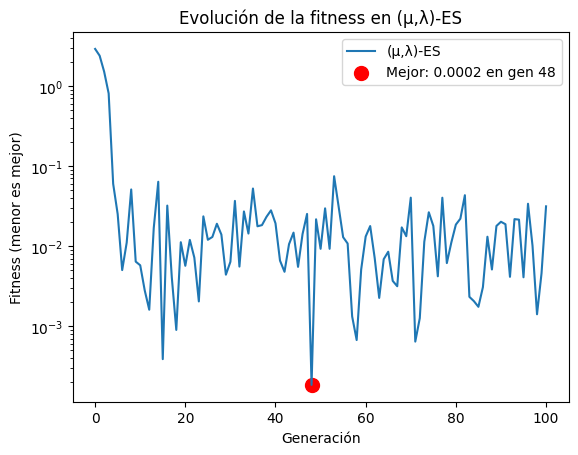

In [31]:
# --- Parámetros ---
DIM = 2
MU = 10       # Número de padres
LAMBDA = 40   # Número de hijos por generación
GENS = 100    # Número de generaciones
SIGMA = 0.5   # Fuerza de mutación
SEED = 42     # Semilla para reproducibilidad

# --- Generador de números aleatorios ---
rng = np.random.default_rng(SEED)

# --- Inicialización de padres ---
parents = rng.normal(0, 5, size=(MU, DIM))        # Generamos MU padres aleatorios
parent_fits = np.apply_along_axis(fitness, 1, parents)  # Fitness de cada padre

# Historial de la mejor fitness por generación
history_mu_lambda = [parent_fits.min()]

# --- (μ,λ)-ES loop ---
for gen in range(GENS):
    offspring = []
    for _ in range(LAMBDA):
        # Seleccionamos un padre al azar
        p = parents[rng.integers(0, MU)]
        # Mutación: agregamos ruido gaussiano
        child = p + rng.normal(0, SIGMA, size=DIM)
        offspring.append(child)
    offspring = np.array(offspring)
    
    # Evaluamos fitness de los hijos
    offspring_fits = np.apply_along_axis(fitness, 1, offspring)
    
    # Selección: elegimos los MU mejores hijos para la siguiente generación
    best_idx = np.argsort(offspring_fits)[:MU]
    parents, parent_fits = offspring[best_idx], offspring_fits[best_idx]
    
    # Guardamos la mejor fitness de la generación
    history_mu_lambda.append(parent_fits.min())

# --- Resultados finales ---
best_fit = min(history_mu_lambda)
best_gen = history_mu_lambda.index(best_fit)
print("Mejor solución (μ,λ):", parents[0])
print("Fitness mínima:", best_fit, "en generación", best_gen)

# --- Gráfica de evolución ---
plt.plot(history_mu_lambda, label="(μ,λ)-ES")
plt.xlabel("Generación")
plt.ylabel("Fitness (menor es mejor)")
plt.yscale("log")
plt.title("Evolución de la fitness en (μ,λ)-ES")

# --- Marcar mejor fitness ---
plt.scatter(best_gen, best_fit, color='red', s=100, 
            label=f'Mejor: {best_fit:.4f} en gen {best_gen}')
plt.legend()
plt.show()

### Representación Grafica

- Eje X → Generaciones (0 a GENS).
- Eje Y (log) → Fitness mínima de cada generación, en escala logarítmica.
- Curva → Cómo mejora el mejor individuo con cada generación.

### Comportamiento

#### Inicio (generación 0-10)
- Los padres están muy dispersos (sigma(0,5)), así que la fitness es alta.
- En la gráfica se ve una caída rápida porque las mutaciones generan algunos hijos mucho más cercanos al mínimo.

#### Medio (generación 10-50)
- La mejora sigue, pero más lenta, porque los hijos ya están cerca del mínimo y las mutaciones producen mejoras más pequeñas.
- La gráfica se aplana gradualmente.

#### Final (generación 50-100)
- La fitness se estabiliza cerca de cero (o un valor muy bajo).

### Inicialización usando (μ+λ)-ES

- De μ padres se generan λ hijos, 
- Compiten padres + hijos juntos, los mejores sobreviven.

### ¿Cuando usar este tipo?

Quieres estabilidad y un balance entre exploración y explotación.

El problema tiene dimensión más alta o requiere conservar buenas soluciones.

Buscas converger de manera más segura, incluso si puede ser más lento.

📌 Ejemplo: Optimización de hiperparámetros en machine learning, donde quieres conservar configuraciones buenas mientras sigues probando nuevas.

Mejor solución (μ+λ): [-0.00094777  0.00902592]
Fitness mínima: 8.236557587717658e-05 en generación 86


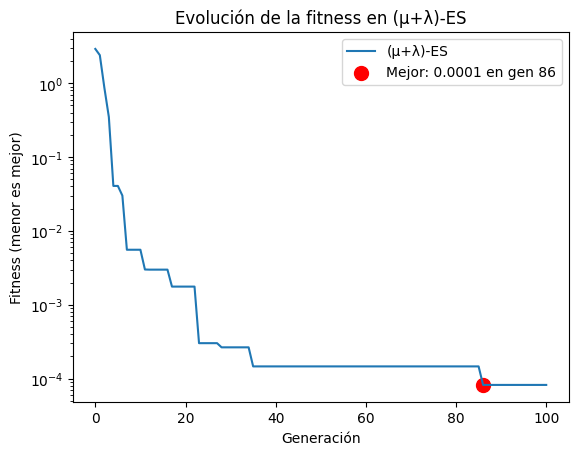

In [32]:
# --- Parámetros ---
DIM = 2
MU = 10       # Número de padres
LAMBDA = 40   # Número de hijos por generación
GENS = 100    # Número de generaciones
SIGMA = 0.5   # Fuerza de mutación
SEED = 42     # Semilla para reproducibilidad

# --- Generador de números aleatorios ---
rng = np.random.default_rng(SEED)

# --- Inicialización de padres ---
parents = rng.normal(0, 5, size=(MU, DIM))
parent_fits = np.apply_along_axis(fitness, 1, parents)

# Historial de la mejor fitness por generación
history_mu_plus_lambda = [parent_fits.min()]

# --- (μ+λ)-ES loop ---
for gen in range(GENS):
    offspring = []
    for _ in range(LAMBDA):
        # Selección aleatoria de un padre
        p = parents[rng.integers(0, MU)]
        # Mutación: agregamos ruido gaussiano
        child = p + rng.normal(0, SIGMA, size=DIM)
        offspring.append(child)
    offspring = np.array(offspring)
    
    # Evaluar fitness de los hijos
    offspring_fits = np.apply_along_axis(fitness, 1, offspring)
    
    # Combinar padres y descendientes
    combined = np.vstack((parents, offspring))
    combined_fits = np.concatenate((parent_fits, offspring_fits))
    
    # Selección: elegir los MU mejores individuos
    best_idx = np.argsort(combined_fits)[:MU]
    parents, parent_fits = combined[best_idx], combined_fits[best_idx]
    
    # Guardar la mejor fitness de esta generación
    history_mu_plus_lambda.append(parent_fits.min())

# --- Resultados finales ---
best_fit = min(history_mu_plus_lambda)
best_gen = history_mu_plus_lambda.index(best_fit)
print("Mejor solución (μ+λ):", parents[0])
print("Fitness mínima:", best_fit, "en generación", best_gen)

# --- Gráfica de evolución ---
plt.plot(history_mu_plus_lambda, label="(μ+λ)-ES")
plt.xlabel("Generación")
plt.ylabel("Fitness (menor es mejor)")
plt.yscale("log")
plt.title("Evolución de la fitness en (μ+λ)-ES")

# --- Marcar mejor fitness ---
plt.scatter(best_gen, best_fit, color='red', s=100,
            label=f'Mejor: {best_fit:.4f} en gen {best_gen}')
plt.legend()
plt.show()

### Representación Gráfica

- Eje X → Generaciones (0 a GENS).
- Eje Y (log) → Fitness mínima de cada generación, en escala logarítmica.
- Curva → Cómo mejora el mejor individuo con cada generación. La línea representa history_mu_plus_lambda, que almacena el fitness mínima considerando la combinación de padres + hijos.

### Comportamiento

#### Inicio (generación 0-10)

- Los padres se inicializan con rng.normal(0,5), así que la fitness inicial es alta.
- La gráfica muestra una caída rápida, porque las mutaciones generan hijos mucho más cercanos al mínimo global y además los padres originales pueden seguir contribuyendo.

#### Medio (generación 10-50)

- La mejora continúa, aunque más lentamente, ya que los hijos y los padres se agrupan cerca del mínimo.
- La ventaja del (μ+λ) sobre (μ,λ) es que los padres pueden sobrevivir si son mejores que los hijos, haciendo que la caída de la curva sea más suave y estable.

#### Final (generación 50-100)

- La fitness se estabiliza cerca de cero, convergiendo al mínimo global de la función sum(x**2).
- La gráfica se aplaca horizontalmente, indicando que tanto los padres como los hijos han alcanzado una solución óptima o casi óptima.

# Conclusiones


- Todos los algoritmos tienden a minimizar la función esfera, acercándose al mínimo global 𝑥= 0x=0.
- La rapidez de convergencia depende de la estructura del algoritmo y la fuerza de mutación (SIGMA).
- En la escala logarítmica, se observa que la mejor fitness mejora rápido al inicio y luego se aplana gradualmente al acercarse al mínimo.


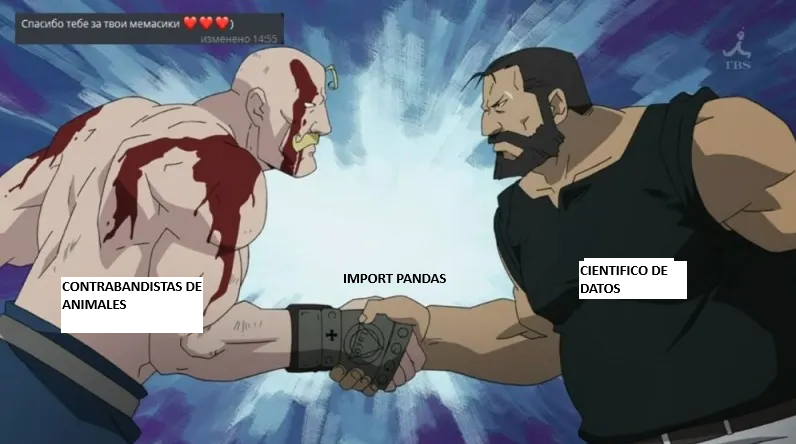